In [ ]:
#Denisse Maria Ramirez Colmenero - A01561497
#Ejercicios realizados en Modulo 5 - Working with Numpy Arrays & Simple APIs
#Subtema: Simple APIs - Part 1

In [ ]:
#Application Program Interfaces 1 
#Your program --> API (input) --> Other software component 
#Your program <-- Data <-- Other software component 

#Panda is a set of software components 
#Usa Panda API to process the data by communicating with the other components 

In [1]:
#Pandas calcula el resultado de las funciones y lo devuelve 
import pandas as pd
dict_={'a':[11,21,31], 'b':[12,22,32]}
df = pd.DataFrame(dict_) 
df.head()#el dataframe se comunica con el API 

,a,b
0,11,12
1,21,22
2,31,32


In [2]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [ ]:
#REST API 
#estos estan conectados a internet y tener acceso a almanenamiento, algoritmos IA y mas datos 
#REST API: Representational State Transfer API 
#el cliente es nuestro codigo, source es el servicio web 
#el cliente envia una solicitud via HTTP conteniendo un JSON file, este archivo contiene instrucciones de la operacion 
#el servicio ejecuta la operacion y de la misma forma manda la informacion al cliente en un archivo JSON


In [4]:
#ejemplo con aplicaciones de deportes 
!pip install nba_api 
from nba_api.stats.static import teams 
nba_teams = teams.get_teams()
nba_teams[:5]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for nba_api, since package 'wheel' is not installed.
  Running setup.py install for nba_api ... done


[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [6]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict: 
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict 

dict_nba_team=one_dict(nba_teams)

df_teams = pd.DataFrame(dict_nba_team)#convertir el diccionario a una dataframe 
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [9]:
df_warriors = df_teams[df_teams['nickname']=='Warriors']
df_warriors


,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [11]:
id_warriors=df_warriors[['id']].values[0][0]#seleccionar una columna 
id_warriors

1610612744

In [12]:
from nba_api.stats.endpoints import leaguegamefinder 
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)#el id unico de los warriors 

In [13]:
games=gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,12022,1610612744,GSW,Golden State Warriors,0012200001,2022-09-30,GSW @ WAS,W,239,96,...,0.775,10.0,52.0,62.0,18,6,3,17,27,9.0
1,22022,1610612744,GSW,Golden State Warriors,1522200074,2022-07-17,GSW vs. WAS,L,201,77,...,0.667,12.0,33.0,45.0,15,6,6,21,20,-10.0
2,22022,1610612744,GSW,Golden State Warriors,1522200056,2022-07-15,GSW vs. OKC,L,202,82,...,0.667,4.0,31.0,35.0,14,7,3,16,23,-8.0
3,22022,1610612744,GSW,Golden State Warriors,1522200035,2022-07-12,GSW vs. BOS,L,199,92,...,0.667,16.0,22.0,38.0,14,7,8,13,23,-18.4
4,22022,1610612744,GSW,Golden State Warriors,1522200023,2022-07-10,GSW @ SAS,W,200,86,...,0.581,13.0,25.0,38.0,14,7,6,16,30,1.0


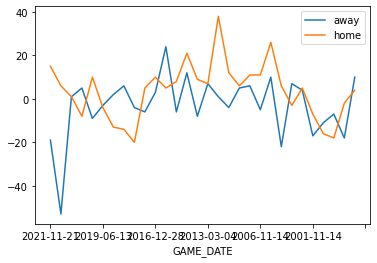

In [18]:
#apartir de ahi poder crear dos dataframes 
games_home=games[games["MATCHUP"]=='GSW vs. TOR']
games_away=games[games["MATCHUP"]=='GSW @ TOR']
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
games_away.plot(x='GAME_DATE', y ='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE', y ='PLUS_MINUS', ax=ax)
ax.legend(["away", 'home'])
plt.show()